## <center>Clustering Assignment1(Airlines)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a Clustering Model for Hierarchical,Kmeans and DBScan for the airlines data to obtain optimum number of clusters and to draw the inferences from the clusters obtained.</code>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import power_transform
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the respective csv file and having a glance at it
Airlines_data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
Airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#### Making necessary EDA for the model

>Dropping the ID# column from the dataset since its not contributing to the model

In [3]:
#Dropping the ID# column
Airlines = Airlines_data.drop('ID#', axis=1)
Airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#checking for the datatype and if any nulls values present in the dataset
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [5]:
#checking for the duplicate values if present any
Airlines[Airlines_data.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


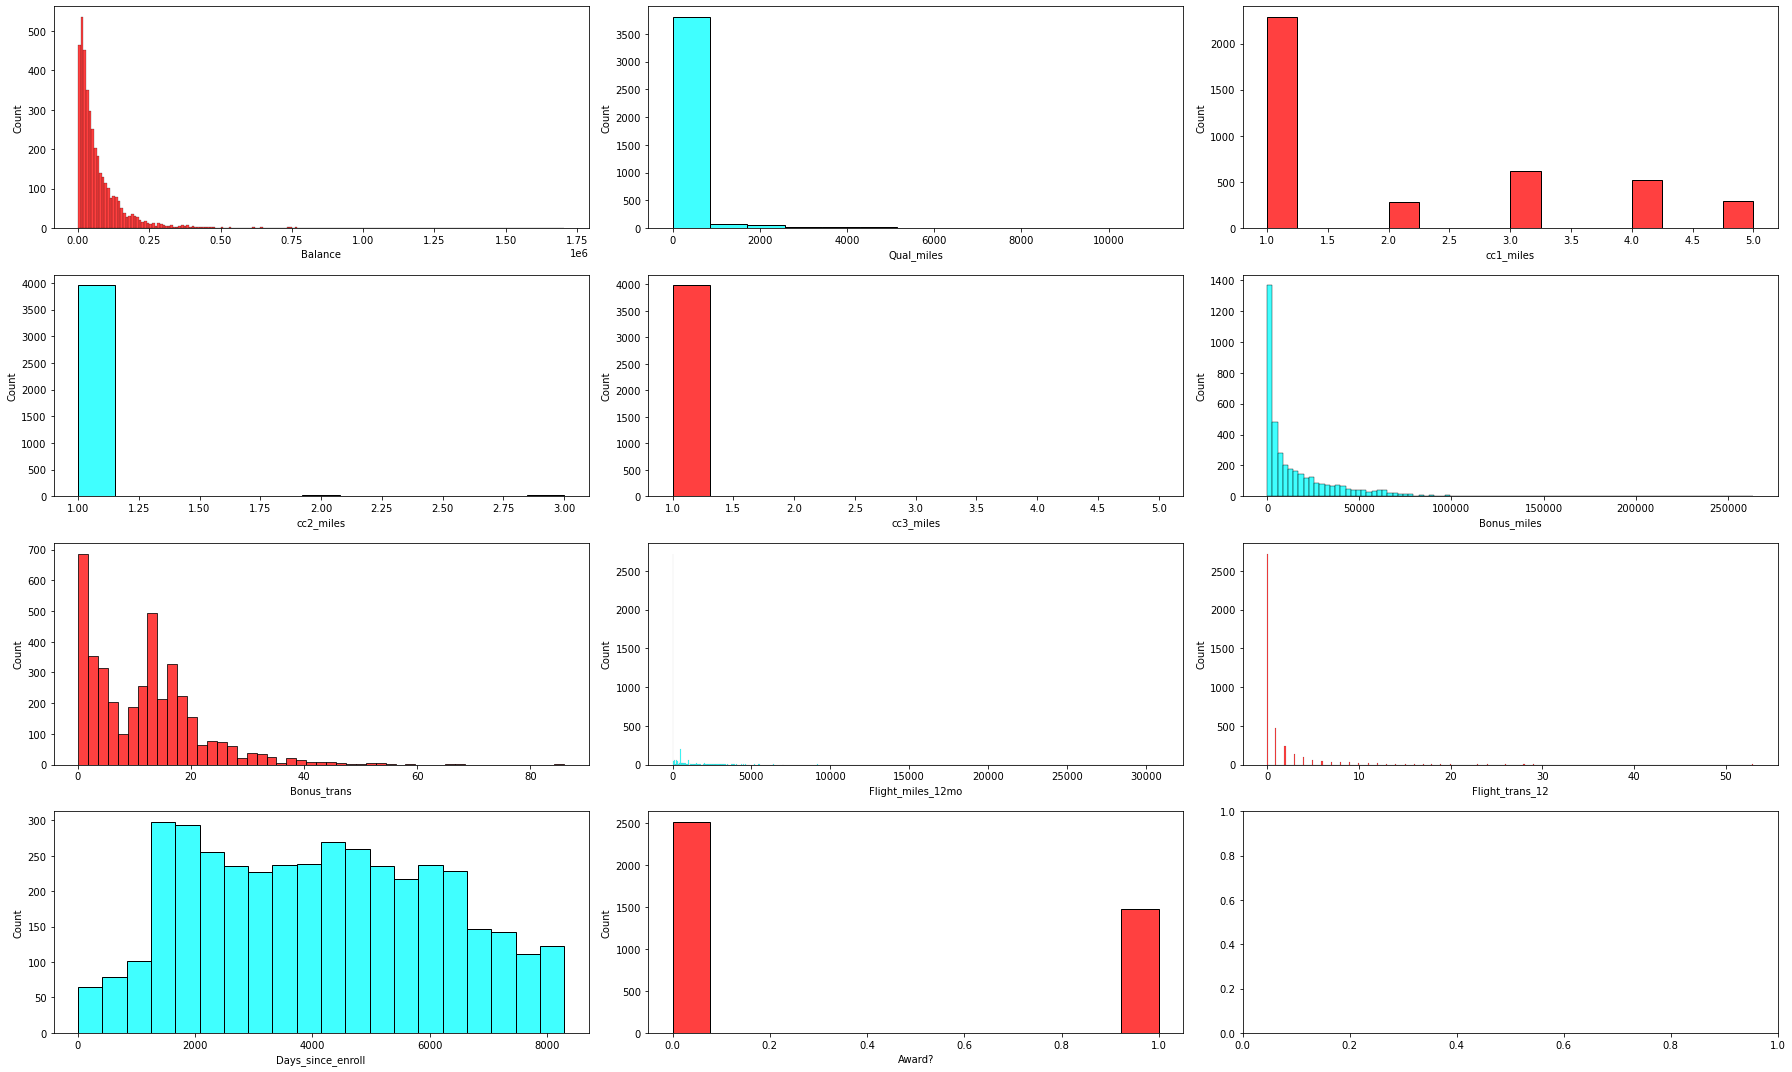

In [6]:
#checking for the outliers in the dataset using the plots
fig, ax = plt.subplots(4, 3, figsize=(25,15))

sns.histplot(Airlines.Balance, ax=ax[0,0],color='red')
sns.histplot(Airlines.Qual_miles, ax=ax[0,1],color='cyan')
sns.histplot(Airlines.cc1_miles, ax=ax[0,2],color='red')

sns.histplot(Airlines.cc2_miles, ax=ax[1,0],color='cyan')
sns.histplot(Airlines.cc3_miles, ax=ax[1,1],color='red')
sns.histplot(Airlines.Bonus_miles, ax=ax[1,2],color='cyan')

sns.histplot(Airlines.Bonus_trans, ax=ax[2,0],color='red')
sns.histplot(Airlines.Flight_miles_12mo, ax=ax[2,1],color='cyan')
sns.histplot(Airlines. Flight_trans_12, ax=ax[2,2],color='red')

sns.histplot(Airlines.Days_since_enroll, ax=ax[3,0],color='cyan')
sns.histplot(Airlines["Award?"] , ax=ax[3,1],color='red')

plt.tight_layout()
plt.show()

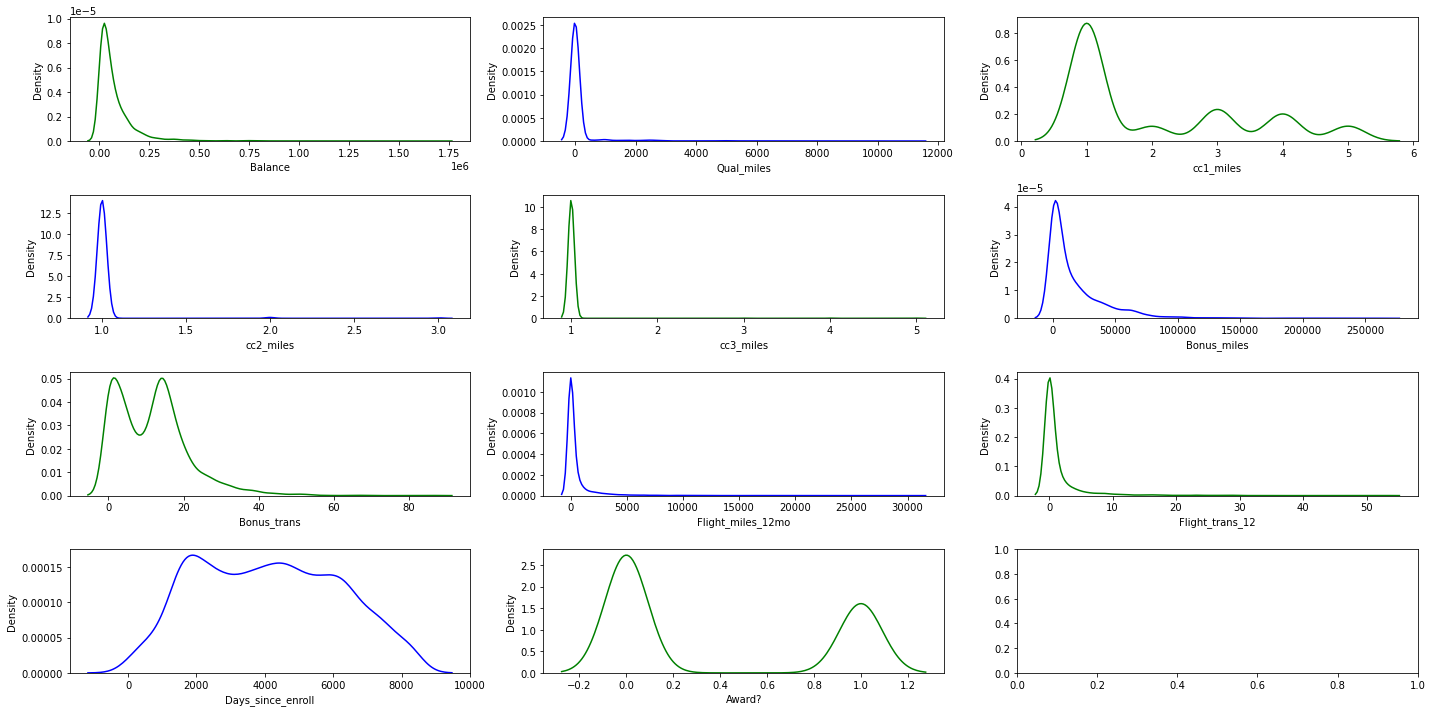

In [7]:
#checking if our data follows normal distribution or not
fig, ax = plt.subplots(4, 3, figsize=(20,10))

sns.kdeplot(Airlines.Balance, ax=ax[0,0],color='g')
sns.kdeplot(Airlines.Qual_miles, ax=ax[0,1],color='b')
sns.kdeplot(Airlines.cc1_miles, ax=ax[0,2],color='g')

sns.kdeplot(Airlines.cc2_miles, ax=ax[1,0],color='b')
sns.kdeplot(Airlines.cc3_miles, ax=ax[1,1],color='g')
sns.kdeplot(Airlines.Bonus_miles, ax=ax[1,2],color='b')

sns.kdeplot(Airlines.Bonus_trans, ax=ax[2,0],color='g')
sns.kdeplot(Airlines.Flight_miles_12mo, ax=ax[2,1],color='b')
sns.kdeplot(Airlines. Flight_trans_12, ax=ax[2,2],color='g')

sns.kdeplot(Airlines.Days_since_enroll, ax=ax[3,0],color='b')
sns.kdeplot(Airlines["Award?"] , ax=ax[3,1],color='g')
plt.tight_layout()
plt.show()

In [8]:
#Standardizing the data to avoid the variance in the data
Airlines_new = Airlines[["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]].values
Airlines_transform = power_transform(Airlines_new, method='yeo-johnson')

In [9]:
Airlines_new=pd.DataFrame(Airlines_transform,columns=["Balance","Qual_miles","cc1_miles","cc2_miles","cc3_miles","Bonus_miles","Bonus_trans","Flight_miles_12mo","Flight_trans_12","Days_since_enroll","Award?"]) 
Airlines_new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


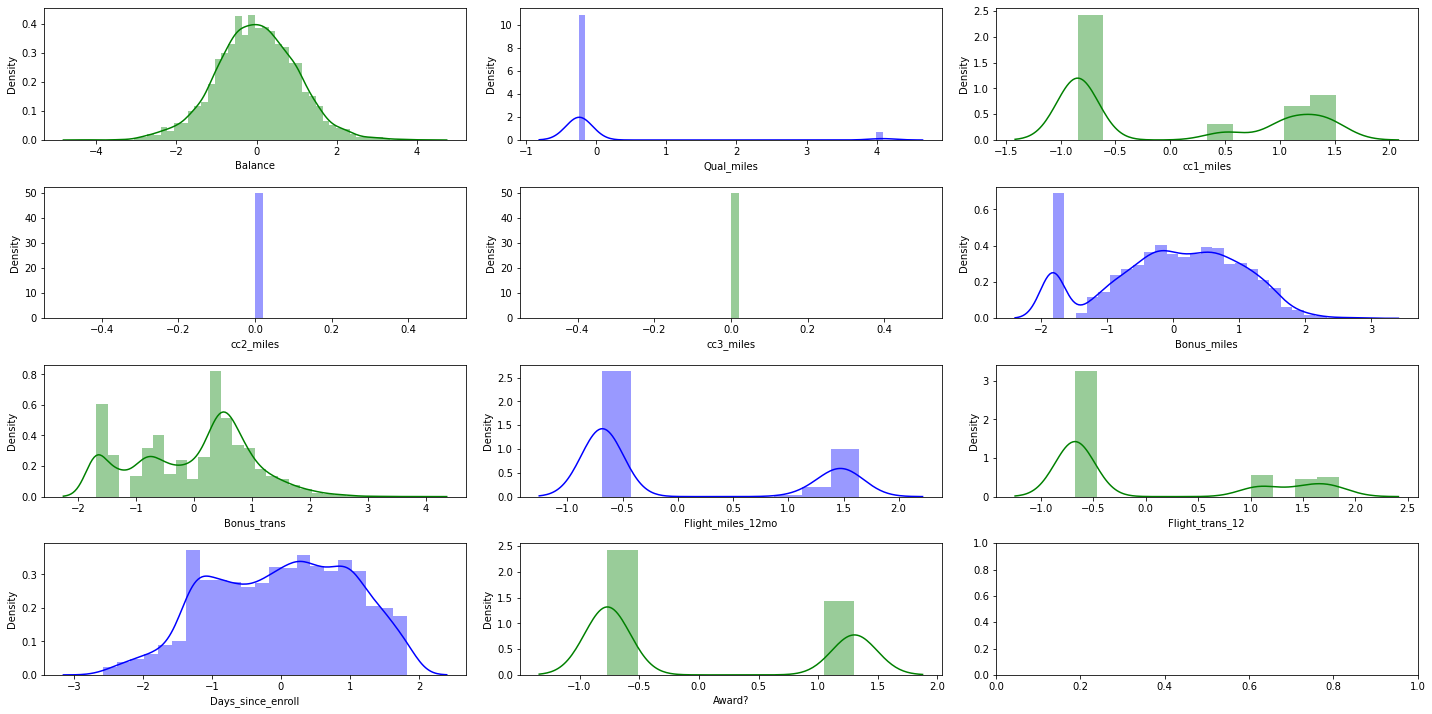

In [10]:
#checking if our data follows normal distribution or not
fig, ax = plt.subplots(4, 3, figsize=(20,10))
sns.distplot(Airlines_new.Balance, ax=ax[0,0],color='g')
sns.distplot(Airlines_new.Qual_miles, ax=ax[0,1],color='b')
sns.distplot(Airlines_new.cc1_miles, ax=ax[0,2],color='g')

sns.distplot(Airlines_new.cc2_miles, ax=ax[1,0],color='b')
sns.distplot(Airlines_new.cc3_miles, ax=ax[1,1],color='g')
sns.distplot(Airlines_new.Bonus_miles, ax=ax[1,2],color='b')

sns.distplot(Airlines_new.Bonus_trans, ax=ax[2,0],color='g')
sns.distplot(Airlines_new.Flight_miles_12mo, ax=ax[2,1],color='b')
sns.distplot(Airlines_new. Flight_trans_12, ax=ax[2,2],color='g')

sns.distplot(Airlines_new.Days_since_enroll, ax=ax[3,0],color='b')
sns.distplot(Airlines_new["Award?"] , ax=ax[3,1],color='g')
plt.tight_layout()
plt.show()

### Performing Heirarchical Clustering 

#### Creating Single Linakge Method

Text(0.5, 1.0, ' Single Linkage Dendogram')

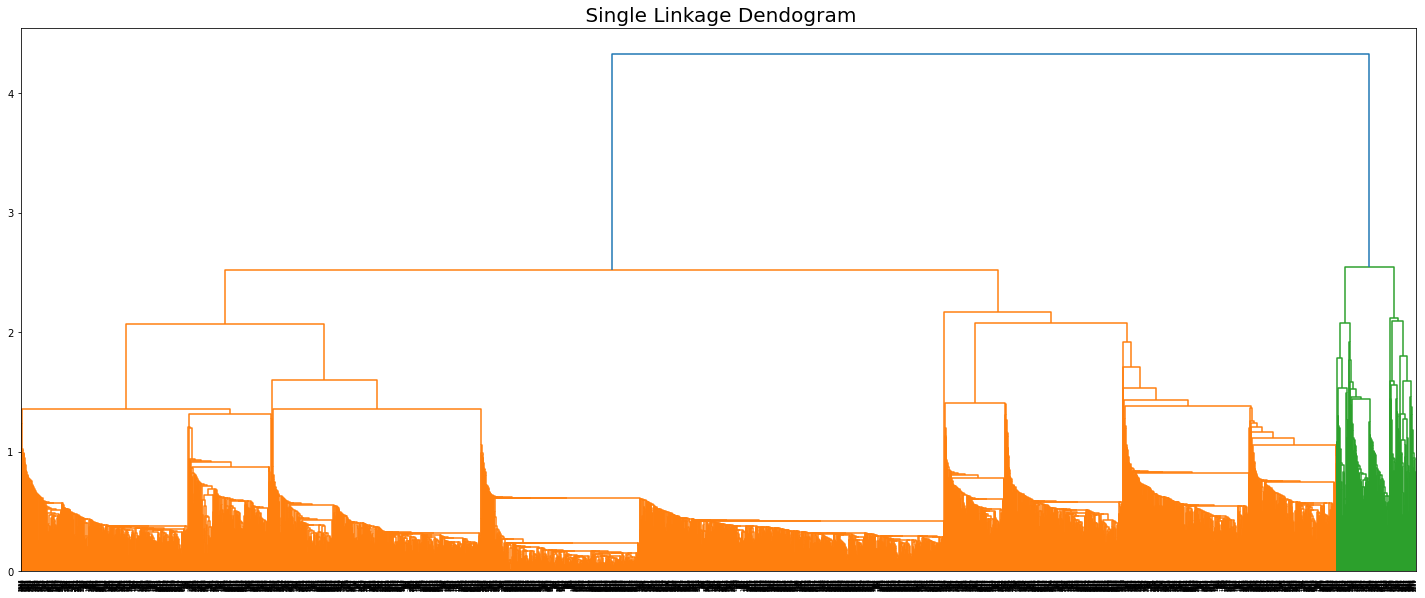

In [11]:
#Plotting the dendogram plot for the Single Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines_transform, method='single'))
plt.title(" Single Linkage Dendogram",size=20)

In [12]:
#Building single linkage model with five cluster 
HC1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')


In [13]:
#fitting the model on the data
y_hc1 = HC1.fit_predict(Airlines_transform)

In [14]:
#Creating the cluster column for the built model
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
Airlines_data['cluster'] = y_hc1

In [15]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(Airlines_data[Airlines_data['cluster'] == i]['ID#'].values)))

cluster 0
Total Values: 75
cluster 1
Total Values: 151
cluster 2
Total Values: 1
cluster 3
Total Values: 2648
cluster 4
Total Values: 1124


#### Creating Complete Linkage Method

Text(0.5, 1.0, 'Dendogram')

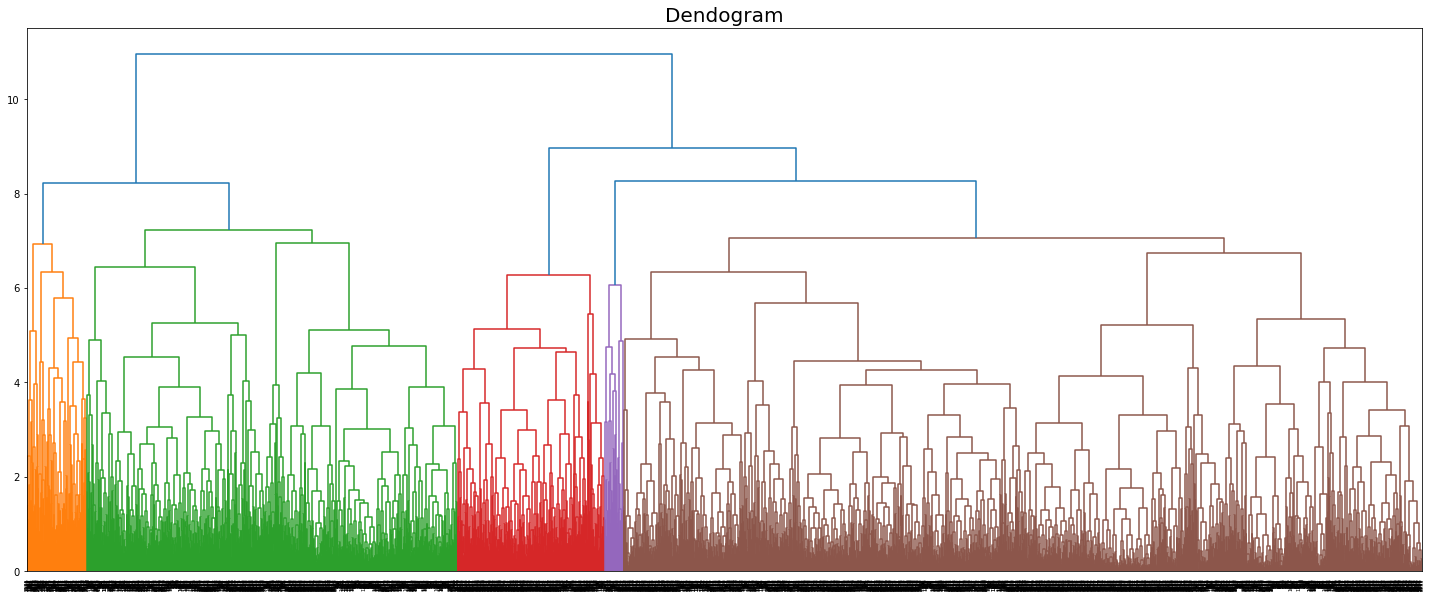

In [16]:
#Plotting the dendogram plot for the Complete Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines_transform, method='complete'))
plt.title("Dendogram",size=20)

In [17]:
#Building complete Linkage model
HC2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [18]:
#fitting the model on the data
y_hc2 = HC2.fit_predict(Airlines_transform)


In [19]:
#Creating the cluster column for the build model
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])
Airlines_data['cluster'] = y_hc2

In [20]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(Airlines_data[Airlines_data['cluster'] == i]['ID#'].values)))

cluster 0
Total Values: 1061
cluster 1
Total Values: 2288
cluster 2
Total Values: 424
cluster 3
Total Values: 53
cluster 4
Total Values: 173


#### Creating Average Linkage Method

Text(0.5, 1.0, ' Average Linakge Dendogram')

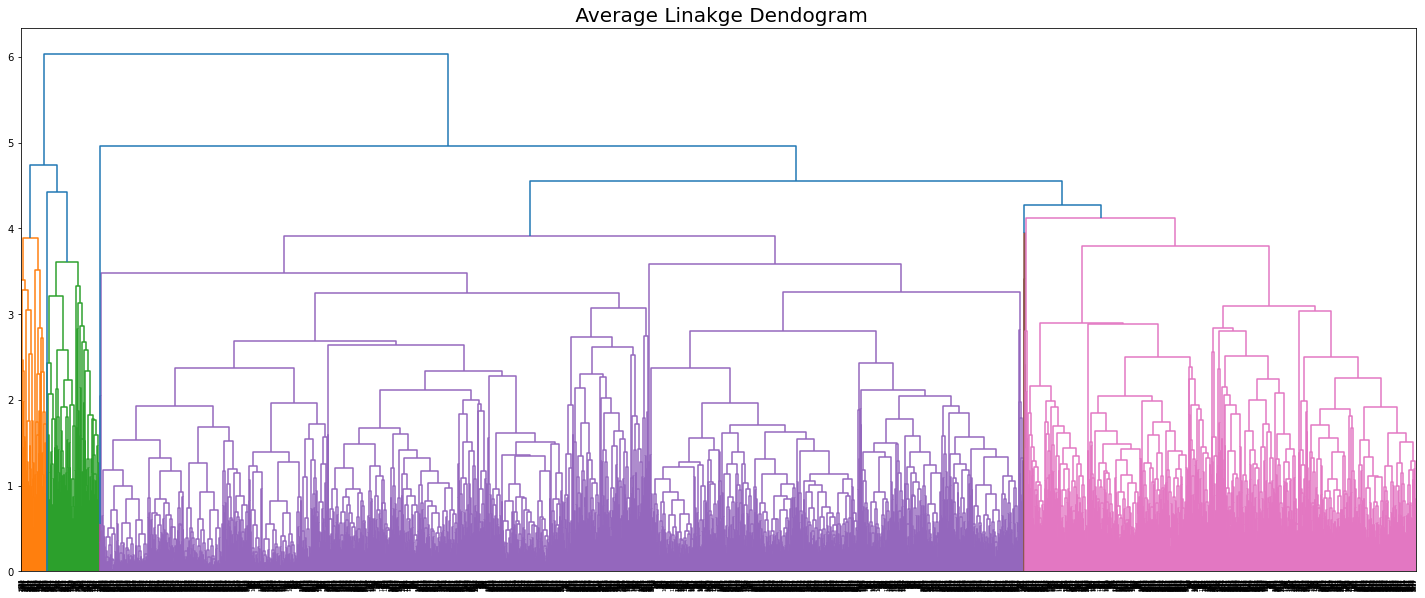

In [21]:
#Plotting the dendogram plot for the Average Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines_transform, method='average'))
plt.title(" Average Linakge Dendogram",size=20)

In [22]:
#Building the Average Linkage Model
HC3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [23]:
#fitting the model on the data
y_hc3 = HC3.fit_predict(Airlines_transform)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [24]:
#Creating the cluster column for the build model
Airlines_data['cluster'] = y_hc3

In [25]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(Airlines_data[Airlines_data['cluster'] == i]['ID#'].values)))

cluster 0
Total Values: 151
cluster 1
Total Values: 1123
cluster 2
Total Values: 2
cluster 3
Total Values: 75
cluster 4
Total Values: 2648


#### Creating Centroid(Ward) Linkage Method

Text(0.5, 1.0, 'Centroid Linkage Dendogram')

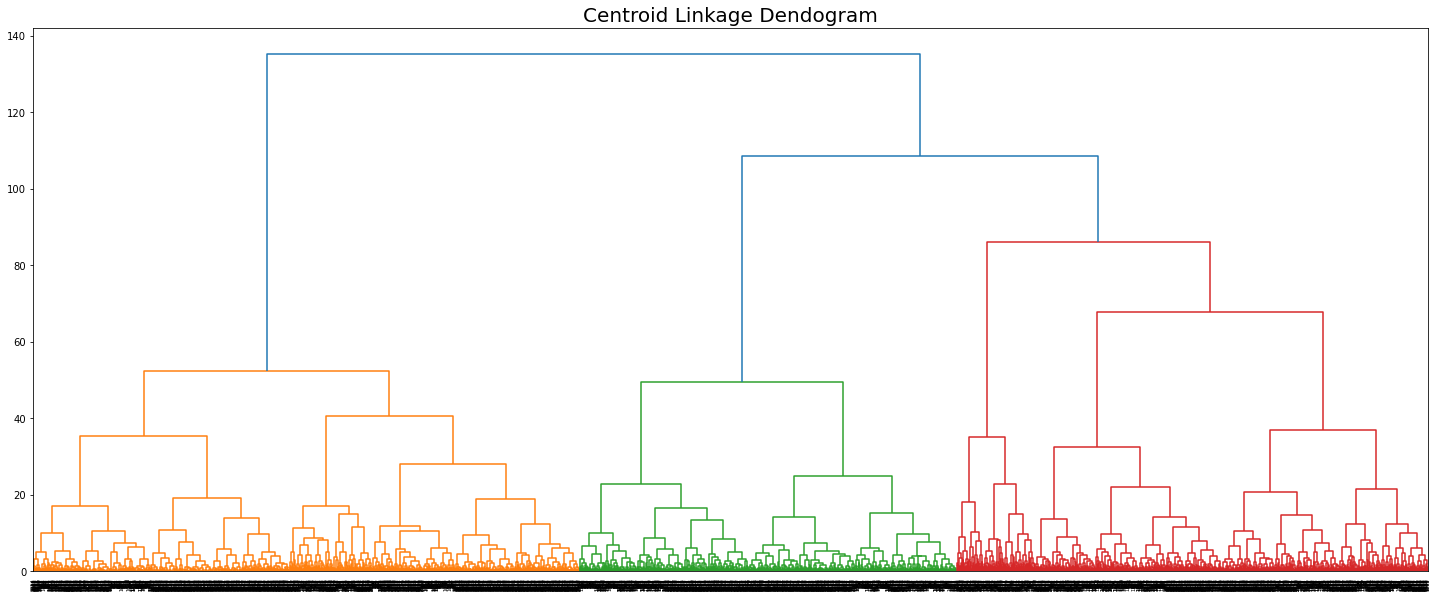

In [26]:
#Plotting the dendogram plot for Centroid Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(Airlines_transform, method='ward'))
plt.title("Centroid Linkage Dendogram",size=20)

In [27]:
#Building Centroid Linkage model
HC4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [28]:
#fitting the model on the data
y_hc4 = HC4.fit_predict(Airlines_transform)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [29]:
#Creating the cluster column for the build model
Airlines_data['cluster'] = y_hc4

In [30]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(Airlines_data[Airlines_data['cluster'] == i]['ID#'].values)))

cluster 0
Total Values: 1567
cluster 1
Total Values: 592
cluster 2
Total Values: 1081
cluster 3
Total Values: 226
cluster 4
Total Values: 533


#### Creating K-means Clustering

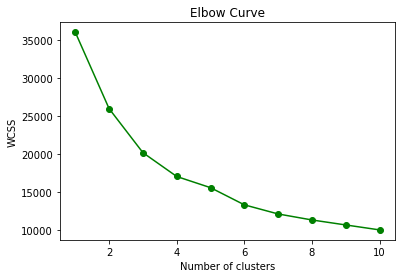

In [31]:
#Plotting an elbow curve to check for k value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Airlines_transform)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

>From the above Elbow curve we can say that we got k=5 that is 5 clusters

In [32]:
#Building K-means Clustering model and fitting the data into it
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(Airlines_transform)

KMeans(n_clusters=5, random_state=42)

In [33]:
#Creating labels and then creating new column to put into our dataset
KM_label=clusters_new.labels_
Airlines_data['cluster'] = clusters_new.labels_

In [34]:
#Checking how many values fall under each of the clusters created
for i in range(5):
    print("cluster", i)
    print("Total Values:", len(list(Airlines_data[Airlines_data['cluster'] == i]['ID#'].values)))

cluster 0
Total Values: 1177
cluster 1
Total Values: 573
cluster 2
Total Values: 1476
cluster 3
Total Values: 551
cluster 4
Total Values: 222


#### Creating DBSCAN Clustering

In [35]:
#Creating a DBSCAN model with eps=0.9 and sample of 8
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=8)
dbscan.fit(Airlines_new)

DBSCAN(eps=0.9, min_samples=8)

In [36]:
#Looking into cluster column
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl.head()

,cluster_db
0,0
1,0
2,0
3,0
4,1


In [37]:
#Concating the original data into cluster column created
Airlines_new2 = pd.concat([Airlines_data,cl],axis=1)
Airlines_new2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,cluster_db
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1


In [38]:
#checking into the data 
Airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


### Evaluating Clustering methods with the help of Silhouette Score 
>The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguised.<br>
0:Means the distance between clusters is not significant<br>
-1:Means clusters are assigned in the wrong way

In [39]:
#Silhouette Score of Single Linkage Method
silhou_SLM=(metrics.silhouette_score(Airlines_transform,y_hc1))
silhou_SLM

0.2971406781364072

In [40]:
#Silhouette Score of Complete Linkage Method
silhou_ComLM=(metrics.silhouette_score(Airlines_transform,y_hc2))
silhou_ComLM

0.19985213995606266

In [41]:
#Silhouette Score of Average Linkage Method
silhou_ALM=(metrics.silhouette_score(Airlines_transform,y_hc3))
silhou_ALM

0.24511194875209383

In [42]:
#Silhouette Score of Centroid(ward) Linkage Method
silhou_CenLM=(metrics.silhouette_score(Airlines_transform,y_hc4))
silhou_CenLM

0.32405500698140643

In [43]:
#Silhouette Score of Kmeans Clustering
Silhou_Kmeans=(metrics.silhouette_score(Airlines_transform,clusters_new.labels_))
Silhou_Kmeans

0.32521670433834216

In [44]:
#Silhouette Score of DBSCAN Clustering
Silhou_DBSCAN=(metrics.silhouette_score(Airlines_transform,Airlines_new2.cluster_db))
Silhou_DBSCAN

0.24472627577594885

In [45]:
#Listing into the table
Table={'Clustering_Models':['HC_Single_linkage','HC_Complete_Linkage','HC_Average_Linakge','HC_Centroid_Linkage','KMeans','DBSCAN'],
  'Silhouette score':[silhou_SLM,silhou_ComLM,silhou_ALM,silhou_CenLM,Silhou_Kmeans,Silhou_DBSCAN]
  }
Table=pd.DataFrame(Table)
Table

,Clustering_Models,Silhouette score
0,HC_Single_linkage,0.297141
1,HC_Complete_Linkage,0.199852
2,HC_Average_Linakge,0.245112
3,HC_Centroid_Linkage,0.324055
4,KMeans,0.325217
5,DBSCAN,0.244726


#### Insights drawn:
>From the table above its evident that different types of hierarchical clustering is way more complex to understand and in them only the centroid linkage is giving a kind of better result compared to other heirarchical clustering.Here of all the clustering methods Kmeans Clustering provides the better result with the cluster number of 5.